In [1]:
import timeit
import matplotlib.pyplot as plt
import random
import numpy as np
from time import perf_counter
from scipy.optimize import curve_fit
from numpy import arange
from numpy import sin
from numpy import sqrt

## COMP20230 - Data Structures & Algorithms
### Assignment 1

### Task 1

In order to compute the factorial of a positive integer n, we must first understand what is meant by factorial of a positive integer. The factorial of a positive integer n, denoted by n!, is the product of all positive integers less than or equal to n.

To calculate the factorial of a positive integer n, I would carry out the following 8 steps:

- 1: Input a number n

- 2: Set variable final as 1

- 3: Final <= final * n

- 4: Decrease n

- 5: Check if n is equal to 0

- 6: If n is equal to zero, goto step 8 (break out of loop)

- 7: Else go to step 3

- 8: Print the result final

### Task 2

- For different values of n, we will be computing and plotting the running time as a function of n for non-tail recursion, tail recursion and an iterative approach.

In [2]:
# A tail recursive function to compute the factorial

def tail(n, a = 1):
 
    if (n == 0):
        return a
    
    return tail(n - 1, n * a)

In [3]:
# A non-tail-recursive function to compute the factorial.

# The function is not tail recursion because the value returned by fact(n-1) 
# is used in fact(n) and calling to fact(n-1) is not the last thing done by fact(n)

def nontail(n):
 
    if (n == 0):
        return 1
 
    return n * nontail(n-1)

In [4]:
# An iterative function for computing the factorial of a number.

def iterative(n):
    fact = 1
    for num in range(2, n + 1):
        fact *= num
    return fact

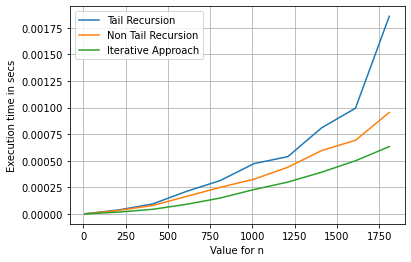

In [5]:
# Computing and Plotting the running time of tail recursion, non-tail recursion and the iterative approach.

i = 10
tailValues = []
nonTailValues = []
itValues = []
nValue = []
while i < 2000:
    # Calculating the average tail recursion time after 500 runs
    tailTimer = (timeit.timeit(f"tail({i})", "from __main__ import tail,i", number=500))/500
    tailValues.append(tailTimer)
    # Calculating the average non-tail recursion time after 500 runs
    nonTailTimer = (timeit.timeit(f"nontail({i})", "from __main__ import nontail,i", number=500))/500
    nonTailValues.append(nonTailTimer)
    # Calculating the average iterative function time after 500 runs
    iterativeTimer = (timeit.timeit(f"iterative({i})", "from __main__ import iterative,i", number=500))/500
    itValues.append(iterativeTimer)
    # Appending nValue to store each of the factorial values
    nValue.append(i)
    i += 200
    
    
plt.xlabel('Value for n') 
plt.ylabel('Execution time in secs') 
plt.plot(nValue, tailValues, label='Tail Recursion')
plt.plot(nValue, nonTailValues, label='Non Tail Recursion')
plt.plot(nValue, itValues, label='Iterative Approach')
plt.grid() 
plt.legend()
plt.savefig("FactorialPlots_Task2")
plt.show()

### Task 3

 - Using a sequence obtained from task 2 (nValue), we will be implementing the linear search and the iterative binary search methods.

In [6]:
# Implementing linear search to find data in nValue

# If data is present then return its location,
# otherwise return -1

# We will be using nValue (list of factorials) as our input for the search algorithm

def linear(arr, n, x):
 
    for i in range(0, n):
        if (arr[i] == x):
            return i
    return -1


data = 810
length = len(nValue)
 
num = linear(nValue, length, data)
if(num == -1):
    print("The data is not present in the array")
else:
    print("The data is present at index: ", num)

The data is present at index:  4


In [7]:
# Implementing iterative binary search to find data in nValue
# The data must be sorted to apply binary search. 
# As we have created the nValue array, we already know this is sorted.

# It returns index of data in nValue if present,
# else returns -1

# We will be using nValue (list of factorials) as our input for the search algorithm

def iterativeBinary(arr, y):
    low = 0
    high = len(arr) - 1
    mid = 0
 
    while low <= high:
 
        mid = (high + low) // 2
 
        # If y is greater, ignore left half
        if arr[mid] < y:
            low = mid + 1
 
        # If y is smaller, ignore right half
        elif arr[mid] > y:
            high = mid - 1
 
        # means y is present at mid
        else:
            return mid
 
    # If we reach here, then the element was not present
    return -1
 
data = 1410
 
# Function call
num = iterativeBinary(nValue, data)
 
if num != -1:
    print("The data is present at index: ", num)
else:
    print("The data is not present in the array")

The data is present at index:  7


### Task 4

- Please see the best and worst running times for both the linear search and iterative binary search listed below.

#### Linear Search
- Best running time: O(1)
- Worst running time: O(n)

#### Iterative Binary Search
- Best running time: O(1)
- Worst running time: O(log n)

- We will attempt to demonstrate these best and worst running times by plotting the running times as a function of n
- We will generate a random sorted list to create 8 arrays and group them under one larger array
- We will loop over these arrays, looking for the best and worst case of each method. We will time each function and plot the best and worst case in the hope of recreating the best and worst running times above.

In [8]:
# Function to generate a sorted list of random numbers in a given range with unique elements

def createRandomSortedList(num, start = 1, end = 100): 
    arr = [] 
    tmp = random.randint(start, end) 
      
    for x in range(num): 
          
        while tmp in arr: 
            tmp = random.randint(start, end) 
              
        arr.append(tmp) 
          
    arr.sort() 
      
    return arr

In [9]:
# Calling the createRandomSortedList function once and creating 8 arrays off of it using slicing.
# These arrays will be used as examples to plot the running time as a function of n

arr1 = createRandomSortedList(200, 0, 1000)
arr2 = arr1[:175]
arr3 = arr1[:150]
arr4 = arr1[:125]
arr5 = arr1[:100]
arr6 = arr1[:75]
arr7 = arr1[:50]
arr8 = arr1[:25]

totalArr = [arr1, arr2, arr3, arr4, arr5, arr6, arr7, arr8]

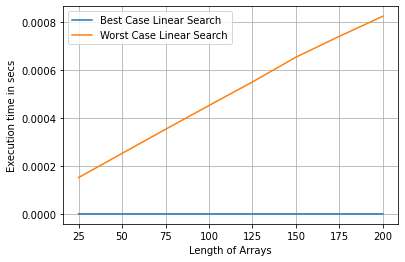

In [10]:
bestLinTime = []
bestLinInd = []
worstLinTime = []
worstLinInd = []
array = len(totalArr)


for x in range(array):
    latest = totalArr[x]
    firstIndex = latest[0]
    lastIndex = latest[len(latest)-1]
    bTime = 0
    wTime = 0
    
    for x in range(100):
        start3 = perf_counter()
        linear(latest, len(latest), firstIndex)
        stop3 = perf_counter()
        bTime += stop3 - start3
        
        start4 = perf_counter()
        linear(latest, len(latest), lastIndex)
        stop4 = perf_counter()
        wTime += stop4 - start4
        
    bestLinTime.append(bTime/100)
    bestLinInd.append(len(latest))
    worstLinTime.append(wTime)
    worstLinInd.append(len(latest))
    
plt.xlabel('Length of Arrays') 
plt.ylabel('Execution time in secs') 
plt.plot(bestLinInd, bestLinTime, label = "Best Case Linear Search")
plt.plot(worstLinInd, worstLinTime, label = "Worst Case Linear Search")

plt.grid() 
plt.legend()
plt.savefig("Linear_Task4")
plt.show()

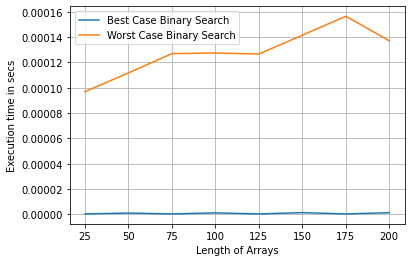

In [11]:
bestBinTime = []
bestBinInd = []
worstBinTime = []
worstBinInd = []
array = len(totalArr)

for x in range(array):
    latest = totalArr[x]
    firstInd = latest[0]
    midpoint = latest[len(latest)//2]
    bTime = 0
    wTime = 0
    
    for x in range(100):
        start1 = perf_counter()
        iterativeBinary(latest, midpoint)
        stop1 = perf_counter()
        bTime += stop1 - start1
        
        start2 = perf_counter()
        iterativeBinary(latest, firstInd)
        stop2 = perf_counter()
        wTime += stop2 - start2
        
    bestBinTime.append(bTime/100)
    bestBinInd.append(len(latest))
    worstBinTime.append(wTime)
    worstBinInd.append(len(latest))
    
plt.xlabel('Length of Arrays') 
plt.ylabel('Execution time in secs') 
plt.plot(bestBinInd, bestBinTime, label = "Best Case Binary Search")
plt.plot(worstBinInd, worstBinTime, label = "Worst Case Binary Search")

plt.grid()
plt.legend()
plt.savefig("Binary_Task4")
plt.show()

### Task 5

Using curve fitting algorithms to find the equation of the running times for the following examples.
- Tail Recursion
- Non-Tail Recursion
- Iterative Approach
- Worst Case Linear Search
- Worst Case Binary Search

A combination of Second Degree Polynomial and a Straight Line Fit graphs will be used for each algorithm, please see below for details.
- Second Degree Polynomial (Tail Recursion, Non-Tail Recursion, Iterative Approach, Worst Case Binary Search)
- Straight Line Fit (Worst Case Linear Search)

In [12]:
# Second Degree Polynomial

def secDegree(x, a, b, c):
    return a * x + b * x**2 + c

In [13]:
# Straight Line Fit

def strtFit(x, a, b):
    return a * x + b

### Tail Recursion - Second Degree Polynomial

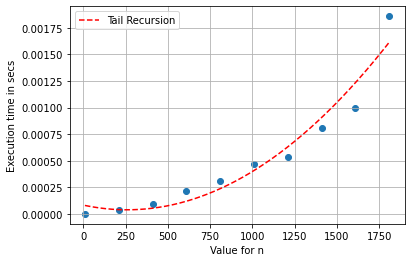

In [14]:
# Using curve fitting algroithm to find the equation of Tail Recursion
# Using Second Degree Polynomial

x, y = nValue, tailValues
# Using second degree polynomial
popt, _ = curve_fit(secDegree, x, y)
a, b, c = popt

plt.scatter(x, y)

x_line = arange(min(x), max(x), 1)
y_line = secDegree(x_line, a, b, c)

plt.xlabel('Value for n') 
plt.ylabel('Execution time in secs') 
plt.plot(x_line, y_line, '--', color='red', label = 'Tail Recursion')
plt.grid() 
plt.legend()
plt.savefig("TailEquation_Task5")
plt.show()

In [15]:
# Equation of Tail Recursion algorithm

print("The equation of Tail Recursion Algorithm: ")
print(a, "* (x) +", b," * (x^2) +", c)

The equation of Tail Recursion Algorithm: 
-3.4009714992297614e-07 * (x) + 6.552274628002715e-10  * (x^2) + 8.417362099736399e-05


##### Testing the equation of Tail Recursion with an x value
- We will sub in an x value to validate our equation
- The answer to our equation should be similar to our y value

In [16]:
print("The calculated y value using the x value 610 on our equation :")
print(a * 610 + b * (610**2) + c )
print("The plotted y value : ")
print(tailValues[3])

The calculated y value using the x value 610 on our equation :
0.00012052449845232957
The plotted y value : 
0.00021209960000000017


### Non-Tail Recursion - Second Degree Polynomial

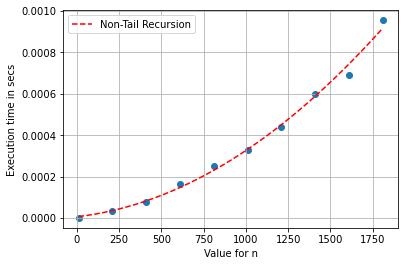

In [17]:
# Using curve fitting algroithm to find the equation of Non-Tail Recursion
# Using Second Degree Polynomial

x, y = nValue, nonTailValues
# Using second degree polynomial
popt, _ = curve_fit(secDegree, x, y)
a, b, c = popt

plt.scatter(x, y)

x_line = arange(min(x), max(x), 1)
y_line = secDegree(x_line, a, b, c)

plt.xlabel('Value for n') 
plt.ylabel('Execution time in secs') 
plt.plot(x_line, y_line, '--', color='red', label = 'Non-Tail Recursion')
plt.grid() 
plt.legend()
plt.savefig("NonTailEquation_Task5")
plt.show()

In [18]:
# Equation of Non-Tail Recursion algorithm

print("The equation of Non-Tail Recursion Algorithm: ")
print(a, "* (x) +", b," * (x^2) +", c)

The equation of Non-Tail Recursion Algorithm: 
9.358213472075826e-08 * (x) + 2.2629482794939945e-10  * (x^2) + 6.70531718091989e-06


##### Testing the equation of Non-Tail Recursion with an x value
- We will sub in an x value to validate our equation
- The answer to our equation should be similar to our y value

In [19]:
print("The calculated y value using the x value 810 on our equation :")
print(a * 810 + b * (810**2) + c )

print("The plotted y value : ")
print(nonTailValues[4])

The calculated y value using the x value 810 on our equation :
0.00023097888292233508
The plotted y value : 
0.0002502887999999999


### Iterative Approach - Second Degree Polynomial

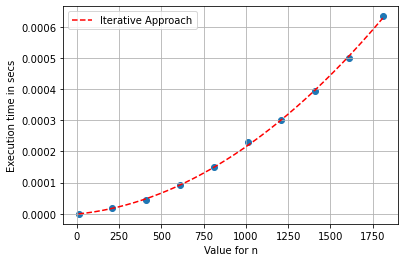

In [20]:
# Using curve fitting algroithm to find the equation of the Iterative Approach
# Using Second Degree Polynomial

x, y = nValue, itValues
# Using second degree polynomial
popt, _ = curve_fit(secDegree, x, y)
a, b, c = popt

plt.scatter(x, y)

x_line = arange(min(x), max(x), 1)
y_line = secDegree(x_line, a, b, c)

plt.xlabel('Value for n') 
plt.ylabel('Execution time in secs') 
plt.plot(x_line, y_line, '--', color='red', label = 'Iterative Approach')
plt.grid() 
plt.legend()
plt.savefig("IterativeEquation_Task5")
plt.show()

In [21]:
# Equation of the Iterative algorithm

print("The equation of the Iterative Algorithm: ")
print(a, "* (x) +", b," * (x^2) +", c)

The equation of the Iterative Algorithm: 
5.369090416618924e-08 * (x) + 1.624263750426531e-10  * (x^2) + -1.0880090871089581e-06


##### Testing the equation of Iterative Approach with an x value
- We will sub in an x value to validate our equation
- The answer to our equation should be similar to our y value

In [22]:
print("The calculated y value using the x value 210 on our equation :")
print(a * 210 + b * (210**2) + c )

print("The plotted y value : ")
print(itValues[1])

The calculated y value using the x value 210 on our equation :
1.7350083927171783e-05
The plotted y value : 
1.7726600000000038e-05


### Worst Case Binary Search - Second Degree Polynomial

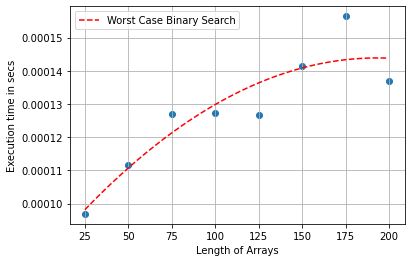

In [23]:
# Using curve fitting algroithm to find the equation of the Worst Case Binary Search
# Using Second Degree Polynomial

x, y = worstBinInd, worstBinTime
# Using second degree polynomial
popt, _ = curve_fit(secDegree, x, y)
a, b, c = popt

plt.scatter(x, y)

x_line = arange(min(x), max(x), 1)
y_line = secDegree(x_line, a, b, c)

plt.xlabel('Length of Arrays') 
plt.ylabel('Execution time in secs') 
plt.plot(x_line, y_line, '--', color='red', label = 'Worst Case Binary Search')
plt.grid() 
plt.legend()
plt.savefig("WorstBinaryEquation_Task5")
plt.show()

In [24]:
# Equation of Worst Case Binary Search algorithm

print("The equation of the Worst Case Binary Search Algorithm: ")
print(a, "* (x) +", b," * (x^2) +", c)

The equation of the Worst Case Binary Search Algorithm: 
6.244285908615557e-07 * (x) + -1.6171429423965692e-09  * (x^2) + 8.35749991106795e-05


##### Testing the equation of Worst Case Binary Search with an x value
- We will sub in an x value to validate our equation
- The answer to our equation should be similar to our y value

In [25]:
print("The calculated y value using the x value 150 on our equation :")
print(a * 150 + b * (150**2) + c )

print("The plotted y value : ")
print(worstBinTime[2])

The calculated y value using the x value 150 on our equation :
0.00014085357153599003
The plotted y value : 
0.00014150000000867635


### Worst Case Linear Search - Straight Line Fit

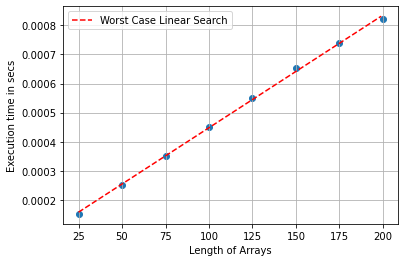

In [26]:
# Using curve fitting algroithm to find the equation of the Worst Case Linear Search
# Plot of straight line fit

x, y = worstLinInd, worstLinTime
# Using straight line fit
popt, _ = curve_fit(strtFit, x, y)
a, b = popt

plt.scatter(x, y)

x_line = arange(min(x), max(x), 1)
y_line = strtFit(x_line, a, b)

plt.xlabel('Length of Arrays') 
plt.ylabel('Execution time in secs') 
plt.plot(x_line, y_line, '--', color='red', label = 'Worst Case Linear Search')
plt.grid() 
plt.legend()
plt.savefig("WorstLinearEquation_Task5")
plt.show()

In [27]:
# Equation of Worst Case Linear Search

print("The equation of the Worst Case Linear Search Algorithm: ")
print(a, "* (x) +", b)

The equation of the Worst Case Linear Search Algorithm: 
3.872619048184659e-06 * (x) + 6.086785707341187e-05


##### Testing the equation of the Worst Case Linear Search with an x value
- We will sub in an x value to validate our equation
- The answer to our equation should be similar to our y value

In [28]:
print("The calculated y value using the x value 200 on our equation :")
print(a * 200 + b)

print("The plotted y value : ")
print(worstLinTime[0])

The calculated y value using the x value 200 on our equation :
0.0008353916667103436
The plotted y value : 
0.0008227999999963487
